# Data cleaning and visualization with Python
This project performs data cleaning and visualization on an automobile dataset to uncover insights about price, performance, and fuel efficiency. 

The data is provided by Coursera: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv
.

## Importing dataset to dataframe.

The first step is to get the data we're going to work on.

In [157]:
# Import necessary libraries.
import pandas as pd
import matplotlib.pylab as plt

In [158]:
# Get the datasets from links.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [159]:
# Import the datasets to dataframe with no headers.
df = pd.read_csv(url, header = None)

Now we should check the dataframe first.

In [161]:
# Checking the imported dataframe.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see, our dataframe does not contain header, so the next step we should assign headers into our dataframe.

In [162]:
# Defining headers name.
df.columns = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
              "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
              "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
              "peak-rpm","city-mpg","highway-mpg","price"]

In [163]:
# Checking the first 5 rows.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now that our dataframe have proper column name, we should validate our dataframe first.

## Validating dataframe.

First we need to validate our dataframe before we can work on it, it's to ensure that our data can be use for analysis. 

In [165]:
# Checking the dataframe info for a quick summary about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [166]:
# Checking the summary of the dataframe to spot anomaly.
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [167]:
# Checking missing value.
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

As we can see, there are no null value present, and it seems, the null value are using "?" as a placeholder.

First we need to check if "?" present in another column.

In [170]:
# Cheking if "?" present in another column.
(df == "?").any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

For the next step, we should check unique value from each column that return True. 

In [169]:
# Checking unique value in normalized-losses column.
df["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [171]:
# Same as before, now we check unique value in num-of-doors column.
df["num-of-doors"].unique()

array(['two', 'four', '?'], dtype=object)

In [172]:
# Now for bore column.
df["bore"].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [173]:
# Next stroke column.
df["stroke"].unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.10', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36',
       '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [174]:
# Again for horsepower column.
df["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [175]:
# Then peak-rpm column.
df["peak-rpm"].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [176]:
# And lastly for price column.
df["price"].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


After we validate each columns for anomaly, we found that "?" symbol is used as placeholder.

Because "?" isn't supposed to be present in numerical value columns,

It's safe to replace "?" with NaN from all the columns instead of replacing it one by one.

In [177]:
# Importing numpy library to convert "?" to NaN.
import numpy as np

# Replacing "?" with NaN for all columns.
df_cleaned = df.replace("?", np.nan)
df_cleaned

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Now we can check how many missing value present in each column.

In [178]:
# Checking missing value present in each column.
missing_count = df_cleaned.isnull().sum()
print("Missing values per column:\n", missing_count)

Missing values per column:
 symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In real world scenario, we should be able to request some of the missing value from the original data source/provider. 

But, since we don't have access to the original data source/provider, for example normalized-losses we can't recalculate it.

We have to improvise to handle missing value in affected columns, so that we can use the data without affecting our analysis too much.

There are many empty values in normalized-losses column, but since dropping the entire rows is not wise, we should replace it with mean value.

In [179]:
# Calculating mean value for normalized-losses.
avg_norm_loss = df_cleaned["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [180]:
# Replacing NaN with mean value in normalized-losses column.
df_cleaned["normalized-losses"] = df_cleaned["normalized-losses"].fillna(avg_norm_loss)

In [181]:
# For num-of-doors column we can check the data first.
df_cleaned[df_cleaned["num-of-doors"].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [182]:
# Checking values in num-of-doors column.
df_cleaned["num-of-doors"].unique()

array(['two', 'four', nan], dtype=object)

Since the empty value is sedan, we should check it first.

In [76]:
# Filtering rows in body-style column for sedan
sedan_rows = df_cleaned[df_cleaned['body-style'] == 'sedan']

# Counting unique values in num-of-doors for sedan
door_counts = sedan_rows['num-of-doors'].value_counts()

print(door_counts)

num-of-doors
four    79
two     15
Name: count, dtype: int64


As we can see, the most frequent number of doors is four for sedan, so we can just replace the NaN value with four.

In [185]:
# Replacing the NaN value with four.
df_cleaned["num-of-doors"] = df_cleaned["num-of-doors"].fillna(avg_norm_loss)

In [186]:
# Same as normalized-losses column, we calculate the mean value for bore first.
avg_bore = df_cleaned["bore"].astype("float").mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [187]:
# Then replacing NaN with mean value in bore column.
df_cleaned["bore"] = df_cleaned["bore"].fillna(avg_bore)

In [188]:
# Calculating mean value for stroke.
avg_stroke = df_cleaned["stroke"].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.255422885572139


In [189]:
# Replacing NaN with mean value in stroke column.
df_cleaned["stroke"] = df_cleaned["stroke"].fillna(avg_stroke)

In [190]:
# Calculating mean value for horsepower.
avg_horsepower = df_cleaned["horsepower"].astype("float").mean(axis=0)
print("Average of horsepower:", avg_horsepower)

Average of horsepower: 104.25615763546799


In [191]:
# Replacing NaN with mean value in horsepower column.
df_cleaned["horsepower"] = df_cleaned["horsepower"].fillna(avg_horsepower)

In [192]:
# Calculating mean value for peak-rpm.
avg_peak_rpm = df_cleaned["peak-rpm"].astype("float").mean(axis=0)
print("Average of peak-rpm:", avg_peak_rpm)

Average of peak-rpm: 5125.369458128079


In [193]:
# Replacing NaN with mean value in peak-rpm column.
df_cleaned["peak-rpm"] = df_cleaned["peak-rpm"].fillna(avg_peak_rpm)

We should drop the rows containing missing value in price column because we can't predict prices.

In [95]:
# Dropping rows in price column that contain missing value.
df_cleaned = df_cleaned.dropna(subset=["price"], axis=0)

# Reset the index for more consistent indexing.
df_cleaned = df_cleaned.reset_index(drop=True)

Let's check how many missing value present in each column now.

In [194]:
# Rechecking how many missing value present in each column.
missing_count = df_cleaned.isnull().sum()
print("Missing values per column:\n", missing_count)

Missing values per column:
 symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64


Now that we have dataset with no missing value let's check our column data types.

In [195]:
# Checking column data types. 
df_cleaned.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [196]:
df_cleaned.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see above normalized-losses, bore, stroke, peak-rpm and price column doesn't have the correct data types.

For normalized-loss and horsepower the correct data types should be integer,

For bore, stroke, peak-rpm and price the data types should be float based on contained data for each columns.

And now we have to assign the correct data types for each columns.

In [197]:
# Converting data types in normalized-losses and horsepower to integer.
df_cleaned[["normalized-losses", "horsepower"]] = df_cleaned[["normalized-losses", "horsepower"]].astype("int")

# Converting data types in bore, stroke, peak-rpm and price to float.
df_cleaned[["bore", "stroke", "peak-rpm", "price"]] = df_cleaned[["bore", "stroke", "peak-rpm", "price"]].astype("float")

In [198]:
df_cleaned.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


Let's check our columns data types once again.

In [199]:
# Checking columns data types - again.
df_cleaned.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

And recheck the summary of the cleaned dataframe.

In [200]:
# Of course.
df_cleaned.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,3,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.253659,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.519219,476.979093,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


After we validate the data types for each column and by looking at the summary above, 

We can see that our data has been cleaned and all column has been assigned to correct data types.  

Now for the last step we're going to make some visualization to get some insight about our data.

## Data visualization for insight.

In this section we're going to find some insight from our dataframe to better visualize our findings.

We can use histogram chart to get some quick insight on horsepower distribution in our dataframe.

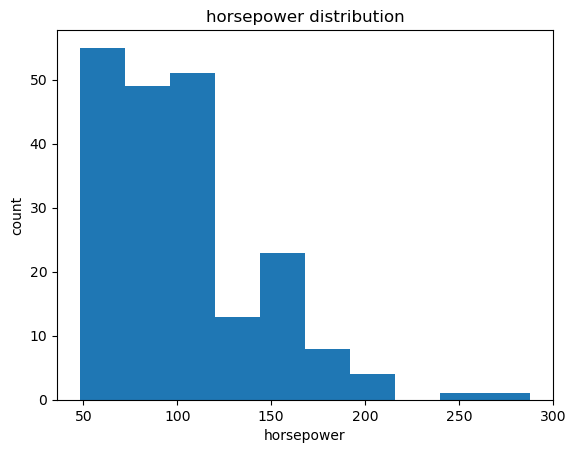

In [213]:
# First import library for visualization.
import matplotlib.pyplot as plt

# Plot the histogram.
plt.hist(df_cleaned["horsepower"])

# Assign labels and title.
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower distribution")

# Then show the plot.
plt.show()

From this chart from our data, we can see that most cars distributed proximately between 50-100 horsepower,

only a few cars have horsepower above 200 

We can also use scatterplot to better see comparison between horsepower and price.

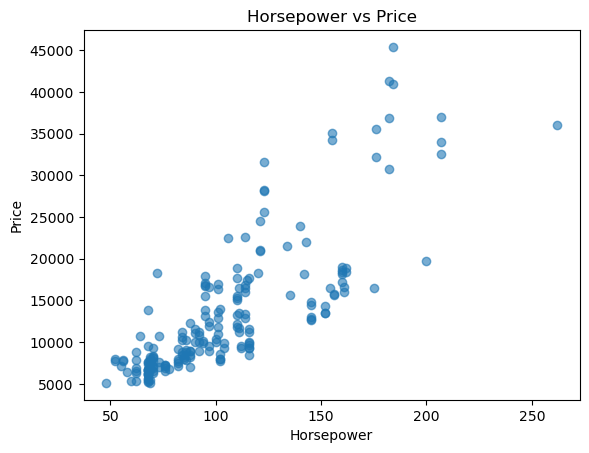

In [202]:
# Plot the scatterplot.
plt.scatter(df_cleaned["horsepower"], df_cleaned["price"], alpha=0.6)

# Assign label and title.
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Horsepower vs Price")

# As usual, show the plot.
plt.show()

The scatterplot shows that horsepower and price are positively correlated. Entry-level cars cluster at low horsepower and low price, 

while higher-end cars generally come with more horsepower and higher price tags.

However, exceptions suggest other factors like brand and luxury features also play a role in pricing. 

Now we can compare miles per gallon for city driving vs highway driving.

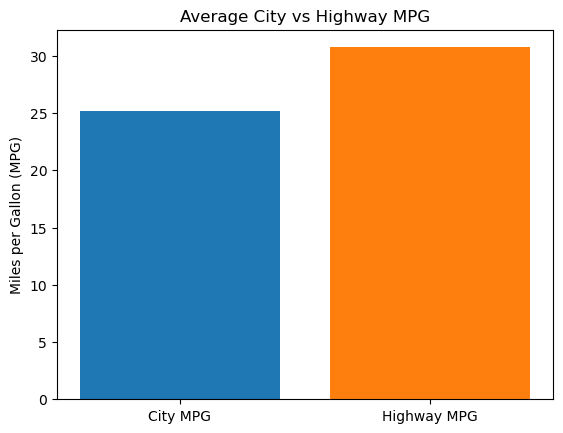

In [216]:
import numpy as np

# Get average mpg values.
avg_city = df_cleaned["city-mpg"].mean()
avg_highway = df_cleaned["highway-mpg"].mean()

# Labels and values.
categories = ["City MPG", "Highway MPG"]
values = [avg_city, avg_highway]

# Create bar chart.
plt.bar(categories, values, color=["#1f77b4", "#ff7f0e"])  # blue & orange, colorblind friendly
plt.ylabel("Miles per Gallon (MPG)")
plt.title("Average City vs Highway MPG")

# Show the plot.
plt.show()


We can also see more detailed view for each car brand.

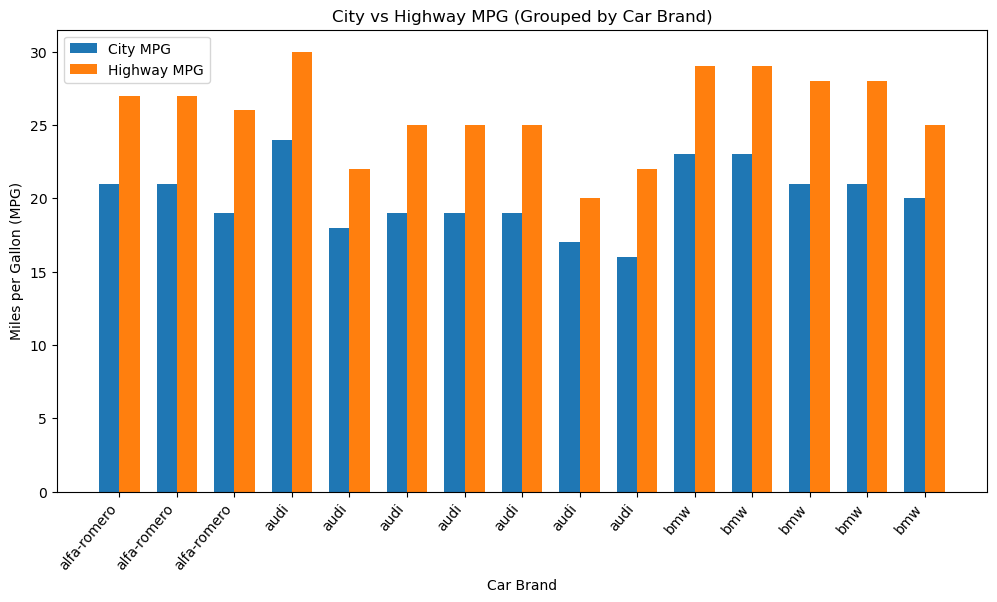

In [227]:
# Take only first N brands (to avoid overcrowding if dataset is large).
N = 15  
subset = df_cleaned.head(N)

# X locations.
x = np.arange(len(subset))  # positions for each car
width = 0.35  # width of each bar

# Plot grouped bars.
fig, ax = plt.subplots(figsize=(12,6))
bars1 = ax.bar(x - width/2, subset["city-mpg"], width, label="City MPG")
bars2 = ax.bar(x + width/2, subset["highway-mpg"], width, label="Highway MPG")

# Labels and formatting.
ax.set_xlabel("Car Brand")
ax.set_ylabel("Miles per Gallon (MPG)")
ax.set_title("City vs Highway MPG (Grouped by Car Brand)")
ax.set_xticks(x)
ax.set_xticklabels(subset["make"], rotation=50, ha="right")  # show brand names
ax.legend()

# Again, show the plot.
plt.show()


This grouped bar chart highlights how different car brands balance city and highway fuel efficiency. 

As expected, highway mpg is consistently higher across all brands, but the gap varies. 

Economy-focused brands (e.g., Honda, Toyota) show higher overall mpg, while luxury brands (e.g., BMW, Mercedes) show lower mpg, 

reflecting a trade-off between performance and efficiency.

Next we're going to compare car price with fuel consumption. 

<Figure size 1000x600 with 0 Axes>

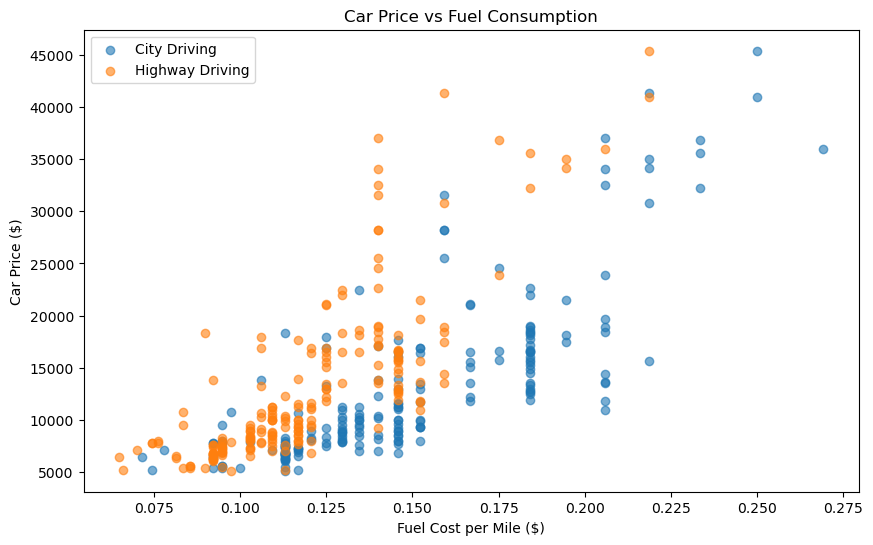

In [208]:
gas_price = 3.5  # per gallon

# Convert mpg to cost per mile
df_cleaned["fuel-cost-city"] = gas_price / df_cleaned["city-mpg"]
df_cleaned["fuel-cost-highway"] = gas_price / df_cleaned["highway-mpg"]

plt.figure(figsize=(10,6))
plt.scatter(df_cleaned["fuel-cost-city"], df_cleaned["price"], alpha=0.6, label="City Driving")
plt.scatter(df_cleaned["fuel-cost-highway"], df_cleaned["price"], alpha=0.6, label="Highway Driving")

plt.xlabel("Fuel Cost per Mile ($)")
plt.ylabel("Car Price ($)")
plt.title("Car Price vs Fuel Consumption")
plt.legend()
plt.show()


The scatter plot reveals a positive correlation between car price and fuel cost per mile: more expensive vehicles tend to have higher fuel costs,
reflecting lower fuel efficiency. 

Economy cars (< $15k) cluster in the bottom-left corner (low price, low cost per mile), 

while luxury cars (> $30k) appear in the top-right (high price, high cost per mile). 

Highway driving consistently results in lower cost per mile compared to city driving

## Analysis.

From the dataset, we see a positive correlation between car price and fuel cost per mile.

1. Economy cars are both affordable and fuel-efficient, clustering in the low price + low fuel cost area.

2. Mid-range cars show a trade-off: some remain efficient, while others start consuming more fuel.

3. Luxury cars are the most expensive to buy and operate, with higher fuel costs per mile due to larger engines and higher horsepower.

4. Across all categories, highway driving is cheaper per mile than city driving, confirming better fuel efficiency on highways.

## Conclusion.

+ Data Cleaning

  - Handled missing values (NaN) in key columns like normalized-losses and num-of-doors.

  - Standardized inconsistent values and removed rows with missing target values (price).

+ Data Validation

  - Verified that numeric columns (e.g., horsepower, price, mpg) had correct data types.

  - Checked distributions and confirmed no unrealistic outliers after cleaning.

+ Data Visualization

  - Histograms revealed the distribution of horsepower and mpg across different car segments.

  - Scatter plots showed strong correlations:

    a. Horsepower ↑ → Price ↑

    b. Fuel efficiency (mpg) ↓ → Price ↑

  - Price binning clarified how car features differ across economy, mid-range, and luxury groups.

+ Data Analysis

  - Economy cars: low purchase cost and lower fuel cost per mile → best choice for budget buyers.

  - Luxury cars: higher price and higher fuel cost per mile → less fuel-efficient but performance-oriented.

  - Highway driving is consistently more fuel-efficient than city driving across all car categories.

  - Overall, there’s a trade-off between affordability, performance, and fuel efficiency.

## Final conclusion.

+ The dataset highlights a clear trade-off between affordability, performance, and fuel efficiency.

  - Budget-conscious buyers gain the most value from economy cars.

  - Luxury cars provide higher horsepower but come with higher purchase and operating costs.

  - Overall, fuel efficiency strongly influences long-term car affordability, making it a key factor in decision-making.